# TLC (Python)

In [62]:
# Libraries
import numpy as np
import pandas as pd
import re
import plotnine as gg

from skimpy import clean_columns

Course 2 tasks:

- Load data, explore, and extract the New York City TLC data with Python
- Use custom functions to organize the information within the New York City TLC dataset
- Build a dataframe for the New York City TLC project
- Create an executive summary for Automatidata

In [15]:
df = pd.read_csv(
   r"data/tlc_dataset.csv",
    header=0,
    skiprows=None
    )

In [16]:
# Check df dimensions against documentation
expected_shape = (22699, 18)
[expected_shape[i] == df.shape[i] for i in range(len(expected_shape))]

[True, True]

In [17]:
# Row and col number
"{r} rows and {c} cols".format(r = len(df.index), c = len(df.columns))

'22699 rows and 18 cols'

In [18]:
# Clean col names
df = clean_columns(df)

In [19]:
# Display the top 10 entries
df.head(n=10)

,unnamed_0,vendor_id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecode_id,store_and_fwd_flag,pu_location_id,do_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [20]:
# Extract col names
df_cols = df.columns
df_cols

Index(['unnamed_0', 'vendor_id', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'ratecode_id', 'store_and_fwd_flag', 'pu_location_id', 'do_location_id',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

**Question 1**: When reviewing the df.info() output, what do you notice about the different variables? Are there any null values? Are all of the variables numeric? Does anything else stand out?

There are no null values. The dataset is perfectly balanced.

Some columns, e.g. dates, need formatting.

**Question 2**: When reviewing the df.describe() output, what do you notice about the distributions of each variable? Are there any questionable values?

We have at least one negative value among the fare amounts. This bears questioning. There are 20 non-positive fares in total in the dataset.

In the same column we have a maximum of $999 against the average of $13, but this does not seem inconsistent with the values in the trip distance column.

In [21]:
# Survey the df structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unnamed_0              22699 non-null  int64  
 1   vendor_id              22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   ratecode_id            22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   pu_location_id         22699 non-null  int64  
 9   do_location_id         22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [22]:
# Check cols for NAs
[df[col].isnull().any() for col in df_cols]

[np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_,
 np.False_]

In [23]:
# Count NAs per col
[df[col].isnull().sum() for col in df_cols]

[np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0)]

In [24]:
# Survey the summary statistics
df.describe()

,unnamed_0,vendor_id,passenger_count,trip_distance,ratecode_id,pu_location_id,do_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [41]:
# How many non-positive fares?
nonnegative_fares = len(df[df["fare_amount"] <= 0].index.tolist())

print("There are", nonnegative_fares, "non-negative fares in all.")

There are 20 non-negative fares in all.


**Question 1:** Sort your first variable (`trip_distance`) from maximum to minimum value, do the values seem normal?

The ten highest trip distances are far above the average, but not implausibly so.

**Question 2:** Sort by your second variable (`total_amount`), are any values unusual?

The highest total amount and fare seems to be an outlier inconsistent with the remaining data after all. The initial assessment needs revising.

**Question 3:** Are the resulting rows similar for both sorts? Why or why not?

There seems to be a somewhat unsystematic relationship between the fares and trip distances.

In [26]:
# Survey the trip_distance col
df.sort_values(by=["trip_distance"], ascending=False, inplace=False).head(n=10)

,unnamed_0,vendor_id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecode_id,store_and_fwd_flag,pu_location_id,do_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
10291,76319330,2,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
29,94052446,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
18130,90375786,1,10/26/2017 2:45:01 PM,10/26/2017 4:12:49 PM,1,30.50,1,N,132,220,1,90.50,0.0,0.5,19.85,8.16,0.3,119.31
5792,68023798,2,08/11/2017 2:14:01 PM,08/11/2017 3:17:31 PM,1,30.33,2,N,132,158,1,52.00,0.0,0.5,14.64,5.76,0.3,73.20
15350,77309977,2,09/14/2017 1:44:44 PM,09/14/2017 2:34:29 PM,1,28.23,2,N,13,132,1,52.00,0.0,0.5,4.40,5.76,0.3,62.96
10302,43431843,1,05/15/2017 8:11:34 AM,05/15/2017 9:03:16 AM,1,28.20,2,N,90,132,1,52.00,0.0,0.5,11.71,5.76,0.3,70.27
2592,51094874,2,06/16/2017 6:51:20 PM,06/16/2017 7:41:42 PM,1,27.97,2,N,261,132,2,52.00,4.5,0.5,0.00,5.76,0.3,63.06


In [27]:
# Sort by the total_amount col
df.sort_values(by=["total_amount"], ascending=True).tail(n=10)

,unnamed_0,vendor_id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecode_id,store_and_fwd_flag,pu_location_id,do_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
11269,51920669,1,06/19/2017 12:51:17 AM,06/19/2017 12:52:12 AM,2,0.00,5,N,265,265,1,120.00,0.0,0.0,20.00,11.52,0.3,151.82
3582,111653084,1,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,1,7.30,5,N,1,1,1,152.00,0.0,0.0,0.00,0.00,0.3,152.30
16379,101198443,2,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,1,25.50,5,N,132,265,2,140.00,0.0,0.5,0.00,16.26,0.3,157.06
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
15474,55538852,2,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,1,0.00,5,N,265,265,1,200.00,0.0,0.5,11.00,0.00,0.3,211.80
12511,107108848,2,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,1,0.00,5,N,265,265,1,175.00,0.0,0.0,46.69,11.75,0.3,233.74
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
20312,107558404,2,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,2,0.00,5,N,265,265,2,450.00,0.0,0.0,0.00,0.00,0.3,450.30
8476,11157412,1,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,1,2.60,5,N,226,226,1,999.99,0.0,0.0,200.00,0.00,0.3,1200.29


In [28]:
# Find total_amount col index
total_amount_index = df.columns.get_loc("total_amount")
col_number = df.shape[1] - 1 # Account for the index shift

print("total_amount col index:")
"{i} out of {total}".format(i = total_amount_index, total = col_number)

total_amount col index:


'17 out of 17'

## A look at payment types

In [42]:
# Find col containing "payment"
payment_col_name = [s for s in df_cols if "payment" in s]
payment_col = df[payment_col_name]

# Find the unique values
payment_unique = payment_col.iloc[:,0].unique()

# Count the unique values
payment_type_count = len(payment_unique)

print("Customers have used", payment_type_count, "different payment methods.")

Customers have used 4 different payment methods.


In [30]:
# How many of each payment type are represented in the data?

payment_key = """1 = Credit card
2 = Cash
3 = No charge
4 = Dispute
5 = Unknown
6 = Voided trip"""

    # Exctract the keys (numbers)
payment_codes = re.findall("\\d+", payment_key)
payment_codes = list(map(int, payment_codes))
    # Extract the values
payment_types = re.findall("(?<= = )[a-zA-Z ]+", payment_key)
payment_types = [s.strip().lower().replace(" ", "_") for s in payment_types]

    # Construct a referable key for later reference
payment_key_dict = dict(zip(payment_codes, payment_types))

    # Log all present payment types
for i in range(len(payment_codes)):
    pay_code = payment_codes[i]
    pay_type = payment_types[i]

    if pay_code in payment_unique:
        print(f"{pay_type} present in the dataset.")

credit_card present in the dataset.
cash present in the dataset.
no_charge present in the dataset.
dispute present in the dataset.


In [43]:
# What is the average tip for trips paid for with credit card?

    # Recode payment type vals
df_recoded = df.copy()
df_recoded["payment_type"] = df_recoded["payment_type"].map(payment_key_dict)

tip_avgs = df_recoded.groupby(["payment_type"])[["tip_amount"]].agg(["mean"])

print("Average tip per payment type:\n")
tip_avgs

Average tip per payment type:



,tip_amount
,mean
payment_type,
cash,0.0000
credit_card,2.7298
dispute,0.0000
no_charge,0.0000


In [44]:
# Payment type count
print("Number of customers per payment type:\n")
df_recoded["payment_type"].value_counts()

Number of customers per payment type:



payment_type
credit_card    15265
cash            7267
no_charge        121
dispute           46
Name: count, dtype: int64

In [45]:
# What is the average tip for trips paid for with cash?
print("Tip from the average cash-payer:\n")
tip_avgs.loc[["cash"]]

Tip from the average cash-payer:



,tip_amount
,mean
payment_type,
cash,0.0


In [46]:
# How many times is each vendor ID represented in the data?
print("Number of times a vendor appears in the dataset:\n")
df["vendor_id"].value_counts()

Number of times a vendor appears in the dataset:



vendor_id
2    12626
1    10073
Name: count, dtype: int64

In [47]:
# What is the mean total amount for each vendor?
print("Average total payment per vendor:\n")
df.groupby("vendor_id")["total_amount"].agg("mean")

Average total payment per vendor:



vendor_id
1    16.298119
2    16.320382
Name: total_amount, dtype: float64

In [36]:
# Filter the data for credit card payments only
df_filtered = df_recoded.copy()
df_filtered = df_filtered[df_filtered["payment_type"] == "credit_card"]

df_filtered.head(n=5)

,unnamed_0,vendor_id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecode_id,store_and_fwd_flag,pu_location_id,do_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,credit_card,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,credit_card,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,credit_card,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,credit_card,20.5,0.0,0.5,6.39,0.0,0.3,27.69
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,credit_card,9.0,0.5,0.5,2.06,0.0,0.3,12.36


In [49]:
# Calculate the average tip amount for each passenger count (credit card payments only)
avg_tip_per_passenger_count = df_filtered.groupby("passenger_count")["tip_amount"].agg("mean")

print("Average tip by number of passengers:\n")
avg_tip_per_passenger_count

Average tip by number of passengers:



passenger_count
0    2.610370
1    2.714681
2    2.829949
3    2.726800
4    2.607753
5    2.762645
6    2.643326
Name: tip_amount, dtype: float64

In [56]:
# Average tip per head
avg_tip_per_capita = avg_tip_per_passenger_count.rename("mean_tip").reset_index()

avg_tip_per_capita["avg_tip_per_capita"] = avg_tip_per_capita["mean_tip"] / avg_tip_per_capita["passenger_count"]

print("Average tip per head by number of passengers:\n")
avg_tip_per_capita


Average tip per head by number of passengers:



,passenger_count,mean_tip,avg_tip_per_capita
0,0,2.610370,inf
1,1,2.714681,2.714681
2,2,2.829949,1.414975
3,3,2.726800,0.908933
4,4,2.607753,0.651938
5,5,2.762645,0.552529
6,6,2.643326,0.440554


In [61]:
# Rides with no passengers
no_passengers_df = df.copy()
no_passengers = len(no_passengers_df[no_passengers_df["passenger_count"] <= 0].index)

print("There are", no_passengers, "rides with no passengers.")

There are 33 rides with no passengers.


## A graphic look at some of the interesting questions

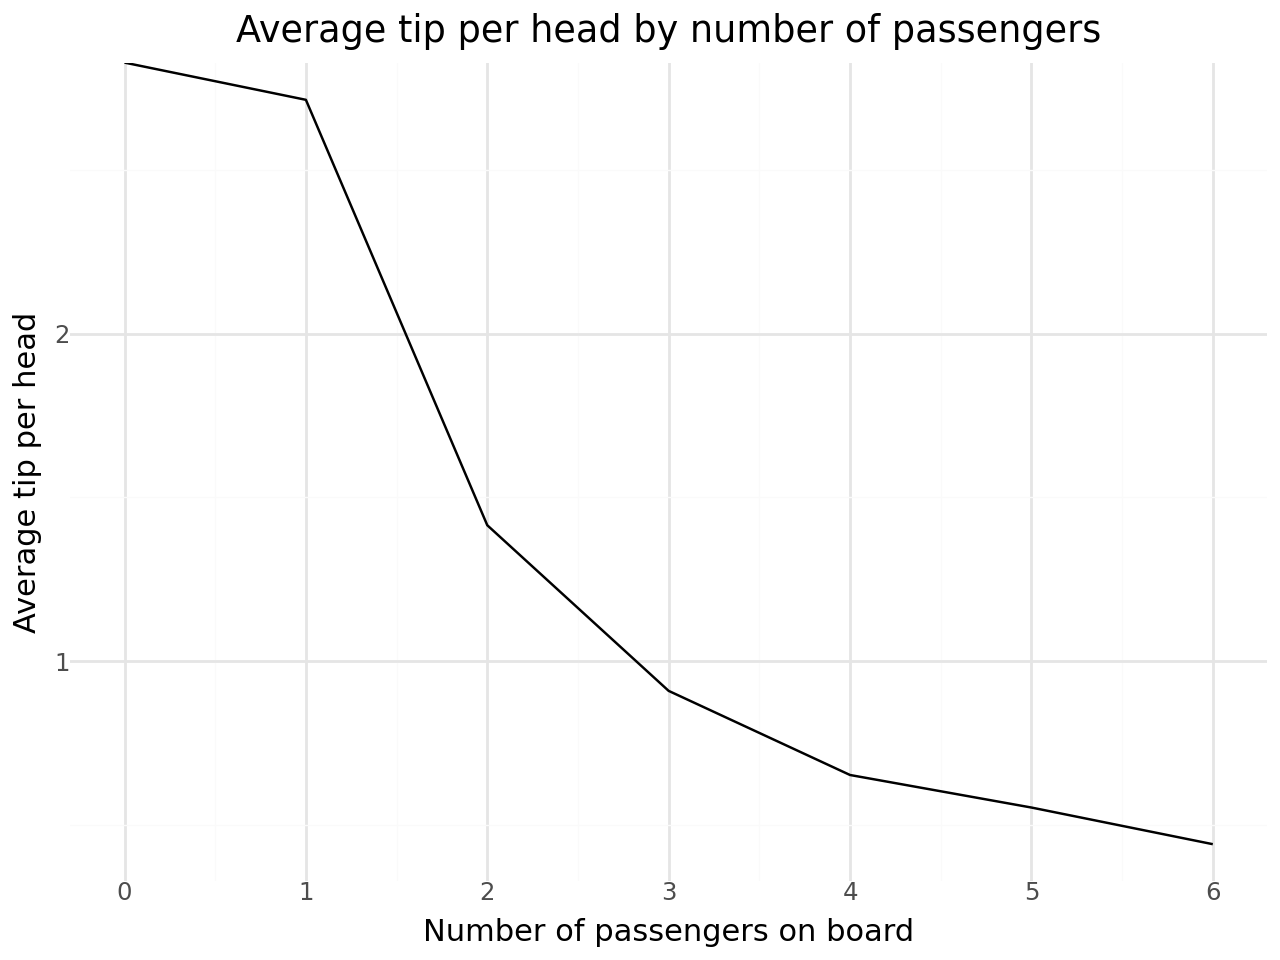

In [68]:
# Relationship between passenger counts and tip per head
(
    gg.ggplot(data = avg_tip_per_capita, mapping = gg.aes(x = "passenger_count", y = "avg_tip_per_capita")) + 
    gg.geom_line() + 
    gg.scale_x_continuous(
        breaks = np.arange(
                        avg_tip_per_capita["passenger_count"].min(),
                        avg_tip_per_capita["passenger_count"].max() + 1,
                        1
                    )
    ) + 
    gg.theme_minimal() + 
    gg.labs(
        title = "Average tip per head by number of passengers",
        x = "Number of passengers on board",
        y = "Average tip per head"
    )
)

Clearly the more passengers are on board, the less the driver gets tipped...

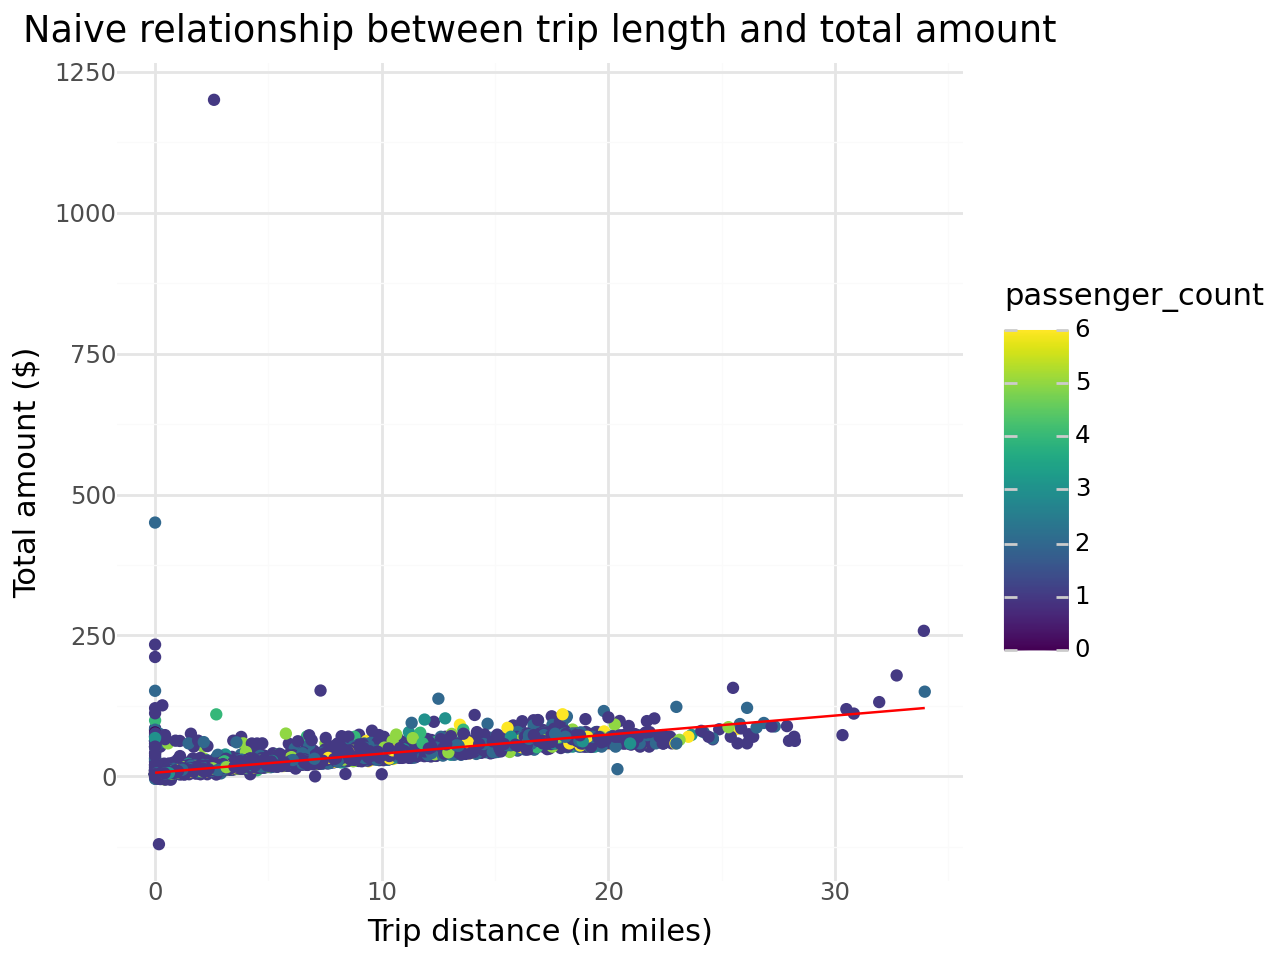

In [69]:
# Naive relationship between trip length and total amount
(
    gg.ggplot(data = df, mapping = gg.aes(x = "trip_distance", y = "total_amount", color = "passenger_count")) + 
    gg.geom_point() + 
    gg.geom_smooth(method="lm", color="red", size=0.5, alpha=0.3) +
    gg.theme_minimal() + 
    gg.labs(
        title = "Naive relationship between trip length and total amount",
        x = "Trip distance (in miles)",
        y = "Total amount ($)"
    )
)

Despite some obvious outliers, there is clearly a positive, linear relationship between trip distance and the amount customers pay. Nonetheless, a more sophisticated approach should control for the number of passengers at the very least.